In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("bike_sharing_demand_train.csv")
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [4]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

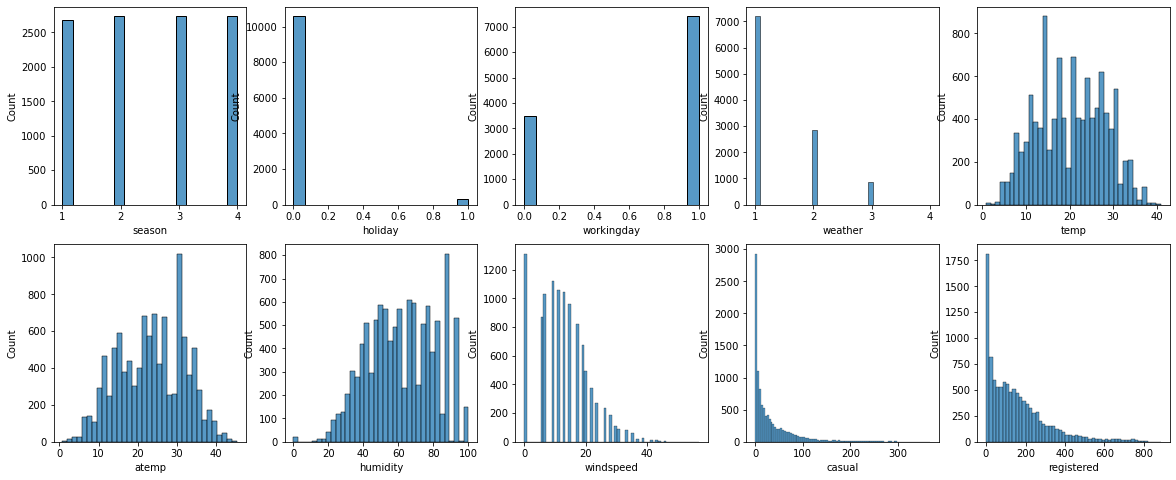

In [7]:
nrows, ncols = 2, 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(20,8)

for i in range(nrows):
    for j in range(ncols):
        attr = i * ncols + j + 1
        sns.histplot(x=data.columns[attr], data=data, ax=axs[i][j])

In [10]:
data['datetime'] = data['datetime'].astype('datetime64')
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second

<AxesSubplot:xlabel='year_month', ylabel='count'>

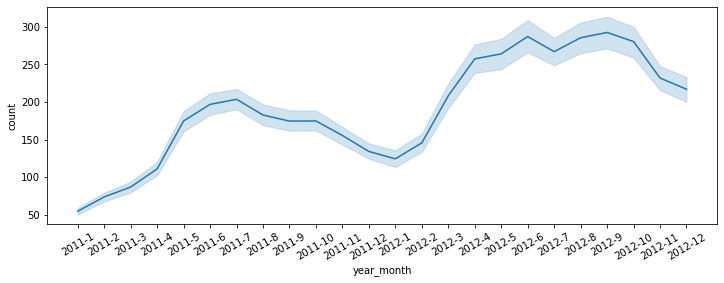

In [11]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)
data['year_month'] = data["datetime"].apply(concatenate_year_month)

plt.subplots(figsize=(12,4))
plt.xticks(rotation = 30)
sns.lineplot(data=data, x='year_month', y="count")

<AxesSubplot:xlabel='month', ylabel='count'>

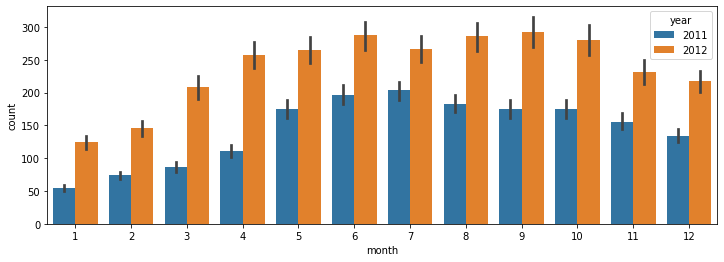

In [13]:
plt.subplots(figsize=(12,4))
sns.barplot(data = data, x='month', y='count',hue='year')

ValueError: Could not interpret input 'dayofweek'

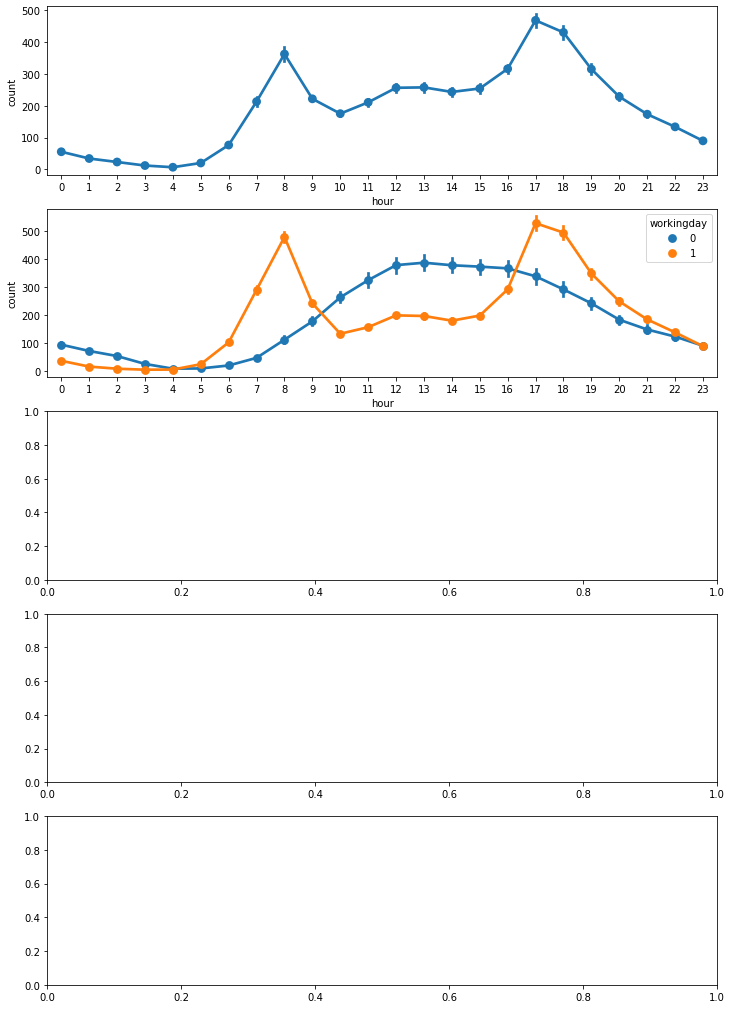

In [17]:
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=5)
fig.set_size_inches(12, 18)

sns.pointplot(data=data, x="hour", y="count", ax=ax1)
sns.pointplot(data=data, x="hour", y="count", hue="workingday", ax=ax2)
sns.pointplot(data=data, x="hour", y="count", hue="dayofweek", ax=ax3)
sns.pointplot(data=data, x="hour", y="count", hue="weather", ax=ax4)
sns.pointplot(data=data, x="hour", y="count", hue="season", ax=ax5)

<AxesSubplot:xlabel='windspeed', ylabel='count'>

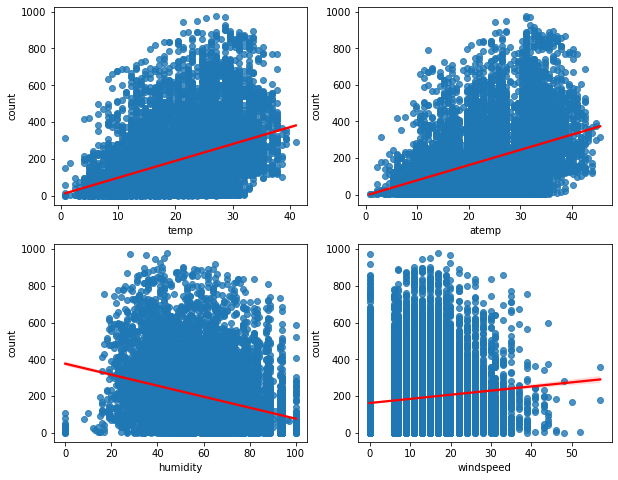

In [18]:
f, ax = plt.subplots(2, 2, figsize=(10, 8))
sns.regplot(x='temp',y='count',data=data, line_kws={'color':'red'}, ax = ax[0][0])
sns.regplot(x='atemp',y='count',data=data, line_kws={'color':'red'}, ax = ax[0][1])
sns.regplot(x='humidity',y='count',data=data, line_kws={'color':'red'}, ax = ax[1][0])
sns.regplot(x='windspeed',y='count',data=data, line_kws={'color':'red'}, ax = ax[1][1])